In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
from datetime import datetime

In [3]:
ds=pd.read_csv('covid.csv')
ds

,Date,Country,Confirmed,Recovered,Deaths
0,2020-01-22,Afghanistan,0,0,0
1,2020-01-22,Albania,0,0,0
2,2020-01-22,Algeria,0,0,0
3,2020-01-22,Andorra,0,0,0
4,2020-01-22,Angola,0,0,0
...,...,...,...,...,...
23683,2020-05-26,West Bank and Gaza,429,365,3
23684,2020-05-26,Western Sahara,9,6,1
23685,2020-05-26,Yemen,249,10,49
23686,2020-05-26,Zambia,920,336,7


In [4]:
ds.isnull().sum()

Date         0
Country      0
Confirmed    0
Recovered    0
Deaths       0
dtype: int64

In [5]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23688 entries, 0 to 23687
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Date       23688 non-null  object
 1   Country    23688 non-null  object
 2   Confirmed  23688 non-null  int64 
 3   Recovered  23688 non-null  int64 
 4   Deaths     23688 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 925.4+ KB


In [6]:
ds.describe()

,Confirmed,Recovered,Deaths
count,2.368800e+04,23688.000000,23688.000000
mean,7.969368e+03,2581.801714,526.935030
std,5.842109e+04,15143.101257,3992.815956
min,0.000000e+00,0.000000,0.000000
25%,0.000000e+00,0.000000,0.000000
50%,1.800000e+01,1.000000,0.000000
75%,7.300000e+02,123.000000,13.000000
max,1.680913e+06,384902.000000,98913.000000


In [7]:
date=ds['Date'].astype(str)
date

0        2020-01-22
1        2020-01-22
2        2020-01-22
3        2020-01-22
4        2020-01-22
            ...    
23683    2020-05-26
23684    2020-05-26
23685    2020-05-26
23686    2020-05-26
23687    2020-05-26
Name: Date, Length: 23688, dtype: object

In [8]:
date=pd.to_datetime(date)
date

0       2020-01-22
1       2020-01-22
2       2020-01-22
3       2020-01-22
4       2020-01-22
           ...    
23683   2020-05-26
23684   2020-05-26
23685   2020-05-26
23686   2020-05-26
23687   2020-05-26
Name: Date, Length: 23688, dtype: datetime64[ns]

In [9]:
date1= pd.DatetimeIndex(date).month
date1

Int64Index([1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
            ...
            5, 5, 5, 5, 5, 5, 5, 5, 5, 5],
           dtype='int64', name='Date', length=23688)

In [10]:
df = pd.DataFrame(date1)
df

,Date
0,1
1,1
2,1
3,1
4,1
...,...
23683,5
23684,5
23685,5
23686,5


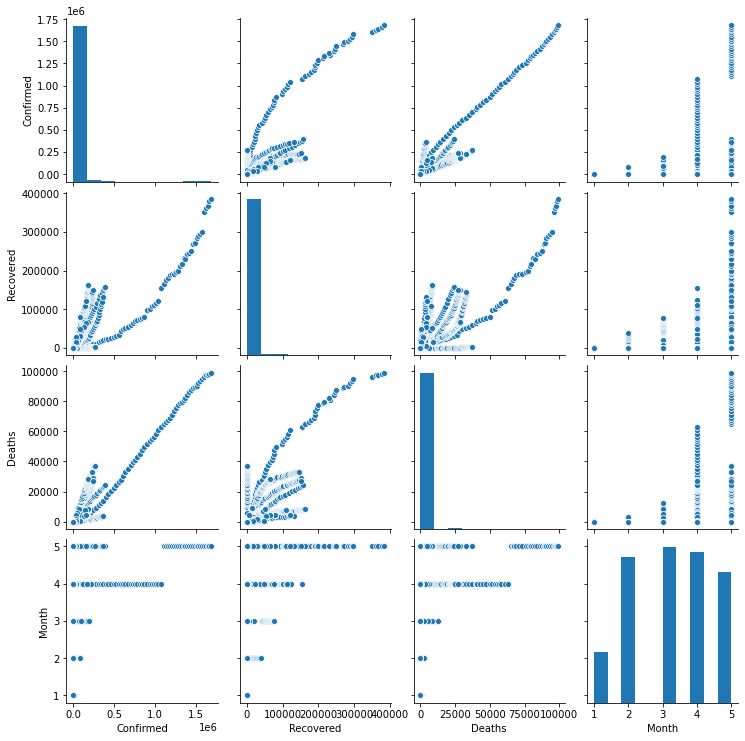

In [11]:
ds=ds.drop('Date', axis=1)
ds['Month']= df
sns.pairplot(ds)

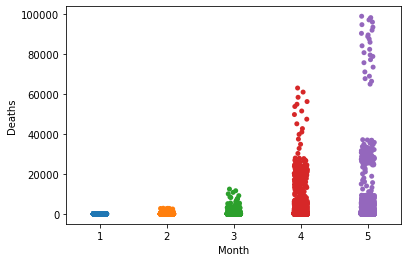

In [44]:
sns.stripplot(x='Month',y="Deaths", data=ds)

death increased with time

In [13]:
ds.corr()

,Confirmed,Recovered,Deaths,Month
Confirmed,1.000000,0.810991,0.929718,0.140860
Recovered,0.810991,1.000000,0.778094,0.187244
Deaths,0.929718,0.778094,1.000000,0.140176
Month,0.140860,0.187244,0.140176,1.000000


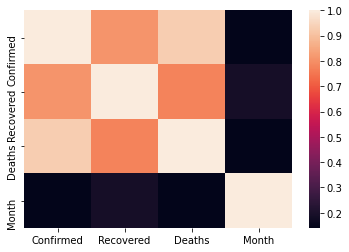

In [14]:
sns.heatmap(ds.corr())

In [15]:
d1=ds.pivot_table(index='Country', values="Deaths")


In [16]:
d1

,Deaths
Country,
Afghanistan,37.055556
Albania,12.928571
Algeria,184.380952
Andorra,17.611111
Angola,1.039683
...,...
West Bank and Gaza,0.896825
Western Sahara,0.007937
Yemen,3.650794


In [17]:
d1=d1.sort_values(by=['Deaths'])

In [18]:
d1.head(20)

,Deaths
Country,
Seychelles,0.0
Eritrea,0.0
Mongolia,0.0
Fiji,0.0
Saint Vincent and the Grenadines,0.0
Grenada,0.0
Holy See,0.0
Timor-Leste,0.0
Cambodia,0.0


best countries as they have zero deaths due to corna

In [19]:
d1.tail(20)

,Deaths
Country,
Russia,561.571429
Peru,567.896825
Ecuador,581.412698
India,666.500000
Switzerland,688.841270
Sweden,1026.023810
Mexico,1097.190476
Turkey,1210.277778
Canada,1427.039683


worst 20 countries as they have most number of death due to corona

In [20]:
ds.dtypes

Country      object
Confirmed     int64
Recovered     int64
Deaths        int64
Month         int64
dtype: object

In [21]:
l1= ds[['Country','Confirmed','Recovered','Deaths']]
ds_grp=l1.groupby(["Country"], as_index=False).mean()

In [22]:
ds_grp

,Country,Confirmed,Recovered,Deaths
0,Afghanistan,1470.126984,165.436508,37.055556
1,Albania,327.404762,203.873016,12.928571
2,Algeria,1905.317460,851.944444,184.380952
3,Andorra,329.944444,164.690476,17.611111
4,Angola,15.015873,4.015873,1.039683
...,...,...,...,...
183,West Bank and Gaza,158.500000,69.825397,0.896825
184,Western Sahara,2.436508,1.476190,0.007937
185,Yemen,21.396825,0.730159,3.650794
186,Zambia,121.309524,41.912698,1.706349


# Active Cases

In [23]:
active=ds_grp['Confirmed']-(ds_grp['Recovered']+ds_grp['Deaths'])
active.loc[174]

360699.3650793651

In [24]:

active.sort_values( ascending=False)

174    360699.365079
178     61727.793651
85      47406.793651
140     46046.515873
62      39823.126984
           ...      
143         2.214286
161         1.865079
132         1.388889
184         0.952381
98          0.150794
Length: 188, dtype: float64

In [25]:
ds_grp.loc[174]

Country           US
Confirmed     453165
Recovered    66894.3
Deaths       25571.2
Name: 174, dtype: object

In [26]:
ds_grp.loc[98]

Country       Lesotho
Confirmed    0.150794
Recovered           0
Deaths              0
Name: 98, dtype: object

US has the number of active cases
Lesotho has lwast number of active cases


# Recovery Rate

In [27]:
recovery=(ds_grp['Recovered']/ds_grp['Confirmed'])*100
recovery

0      11.253212
1      62.269411
2      44.714042
3      49.914608
4      26.744186
         ...    
183    44.053878
184    60.586319
185     3.412463
186    34.550213
187    21.193182
Length: 188, dtype: float64

In [28]:
recovery.sort_values( ascending=False)

36     76.383700
30     73.379860
168    73.040205
78     72.439716
143    71.355236
         ...    
157     1.003988
122     0.563424
178     0.478977
104     0.000000
98      0.000000
Length: 188, dtype: float64

In [29]:
ds_grp.loc[36]

Country        China
Confirmed    70409.6
Recovered    53781.5
Deaths       3052.83
Name: 36, dtype: object

In [30]:
ds_grp.loc[104]

Country      MS Zaandam
Confirmed       4.06349
Recovered             0
Deaths         0.888889
Name: 104, dtype: object

In [31]:
ds_grp.loc[98]

Country       Lesotho
Confirmed    0.150794
Recovered           0
Deaths              0
Name: 98, dtype: object

as we see that china has the best recovery rate

# Death Rate

In [32]:
death=(ds_grp['Deaths']/ds_grp['Confirmed'])*100
death.sort_values( ascending=False)

104    21.875000
185    17.062315
16     14.619445
178    14.523803
62     13.829860
         ...    
144     0.000000
143     0.000000
142     0.000000
141     0.000000
132     0.000000
Length: 188, dtype: float64

In [33]:
ds_grp.loc[104]

Country      MS Zaandam
Confirmed       4.06349
Recovered             0
Deaths         0.888889
Name: 104, dtype: object

# Best performing country|

In [34]:
best= recovery - death 
best.sort_values( ascending=False)

30     73.379860
36     72.047881
78     71.958552
168    71.452604
143    71.355236
         ...    
74     -0.263875
122   -11.205352
185   -13.649852
178   -14.044826
104   -21.875000
Length: 188, dtype: float64

In [35]:
ds_grp.loc[30]

Country      Cambodia
Confirmed     63.6825
Recovered     46.7302
Deaths              0
Name: 30, dtype: object

In [36]:
ds_grp.loc[104]

Country      MS Zaandam
Confirmed       4.06349
Recovered             0
Deaths         0.888889
Name: 104, dtype: object

we see that Cambodia is the best country with more recoverd percentage and less death percentage
while MS Zaandam is worst performing country

In [37]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()


In [81]:
y=ds.loc[:, ['Deaths']]
x=ds.loc[:, ['Month','Country','Recovered',"Confirmed"]]
x

,Month,Country,Recovered,Confirmed
0,1,Afghanistan,0,0
1,1,Albania,0,0
2,1,Algeria,0,0
3,1,Andorra,0,0
4,1,Angola,0,0
...,...,...,...,...
23683,5,West Bank and Gaza,365,429
23684,5,Western Sahara,6,9
23685,5,Yemen,10,249
23686,5,Zambia,336,920


In [82]:
x['Country']=le.fit_transform(x['Country'])

In [91]:
x['Country']=x['Country'].astype('int64')

Month        int64
Country      int64
Recovered    int64
Confirmed    int64
dtype: object

In [102]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error

In [112]:
max_score=0
lr=LinearRegression()
for i in range(35,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y, random_state=i, test_size=0.20)
    lr.fit(x_train,y_train)
    predlr=lr.predict(x_test)
    r2=r2_score(y_test,predlr)
    if r2>max_score:
        max_score=r2
        final=i
print('for', i, 'max r2 score is', max_score)

for 99 max r2 score is 0.9244410004470864


In [113]:
x_train,x_test,y_train,y_test=train_test_split(x,y, random_state=99, test_size=0.20)
lr.fit(x_train,y_train)
predlr=lr.predict(x_test)
r2=r2_score(y_test,predlr)
r2

0.8946446592875373

In [114]:
from sklearn.model_selection import cross_val_score

print(cross_val_score(lr,x,y,cv=5).mean())

0.08456098948303861


In [116]:
import joblib
joblib.dump(lr,"corona.pkl")

['corona.pkl']